In [1]:
import numpy as np
import googlemaps
import CycleGan
import glob
import imageio
import scipy
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Pre-processing
### splitting images

In [5]:
path=".\\data\\map\\train\\*.jpg"
file_names=glob.glob(path)

for e,file in enumerate(file_names):
    assert False
    # prevent accidental run
    #assert False
    
    img=imageio.imread(file)
    number=file.split("\\")[-1].split('.')[0]
    
    # confirm fixed image size
    assert img.shape==(600,1200,3)
    scipy.misc.imsave(".\\data\map\\trainA\\%s.jpg" % number , scipy.misc.imresize(img[:,:600,:], size=(512,512,3)))
    scipy.misc.imsave(".\\data\map\\trainB\\%s.jpg" % number , scipy.misc.imresize(img[:,600:,:], size=(512,512,3)))
    

AssertionError: 

## Training

In [2]:
cyclegan=CycleGan.CycleGan('.\\data\\map\\', 512,512, 3, 10)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


C:\Users\David\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0


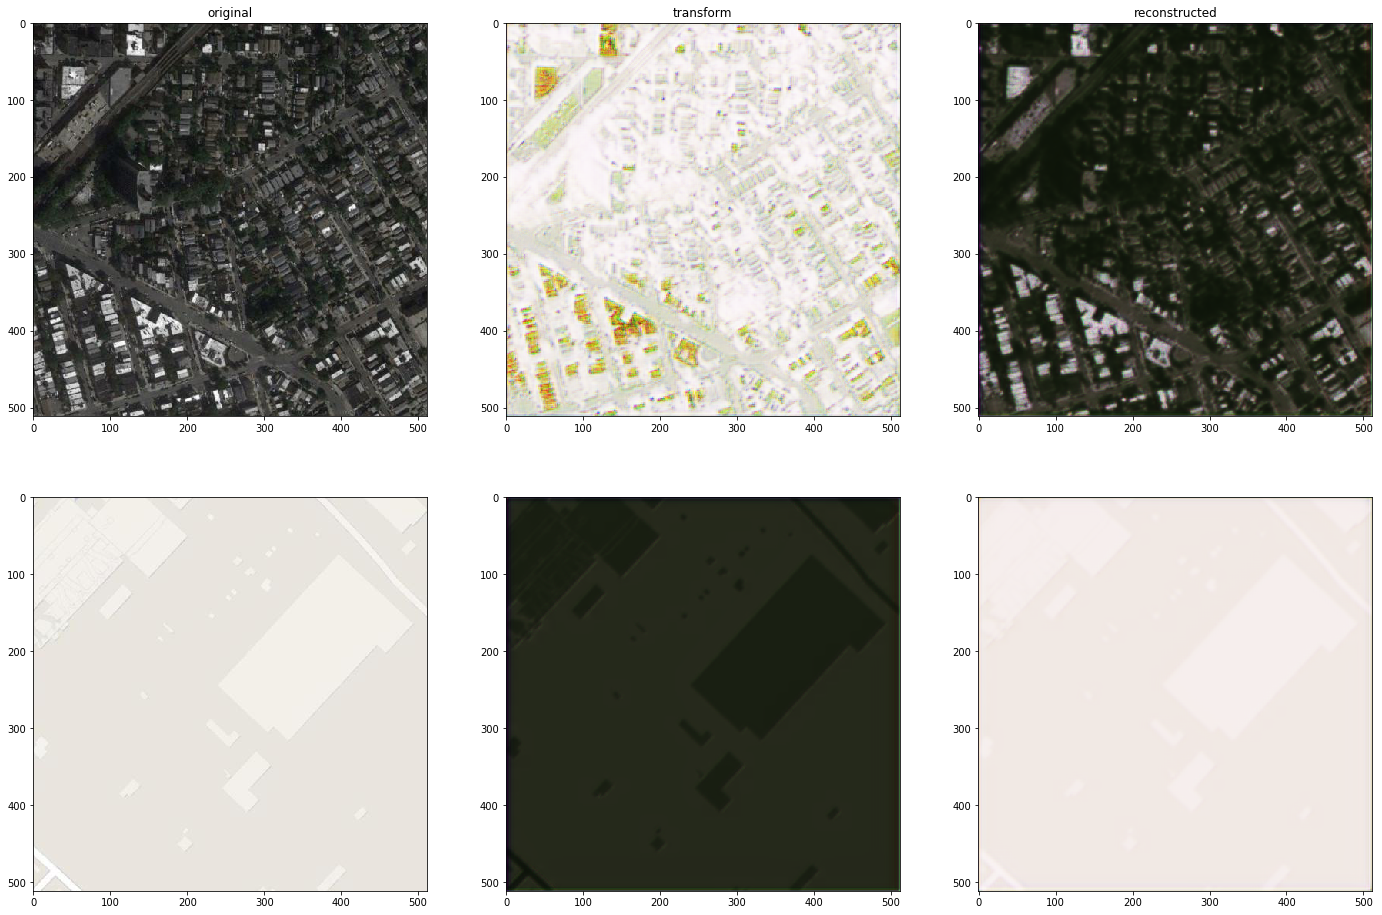

1


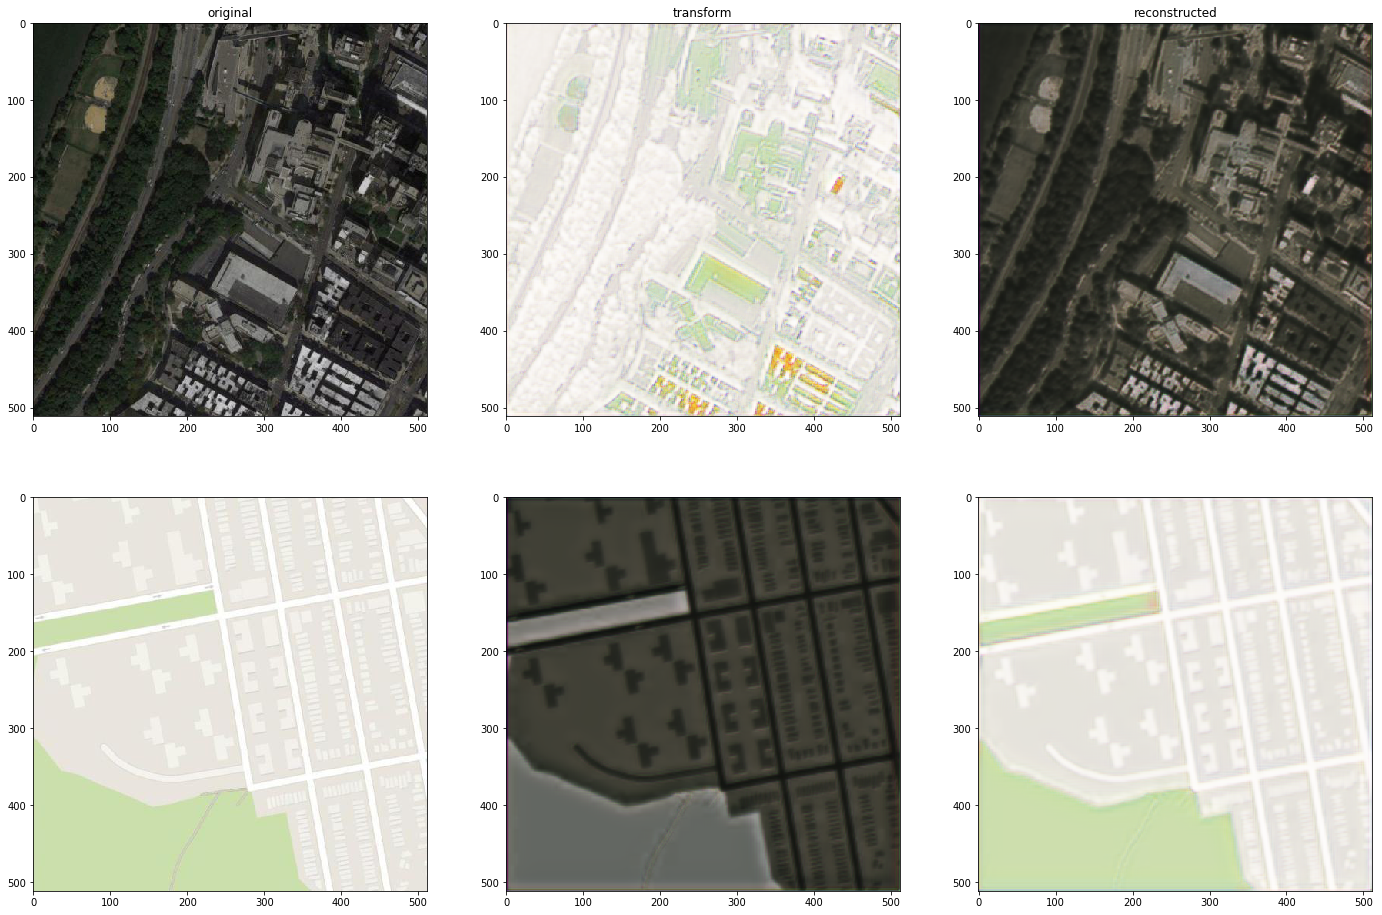

2


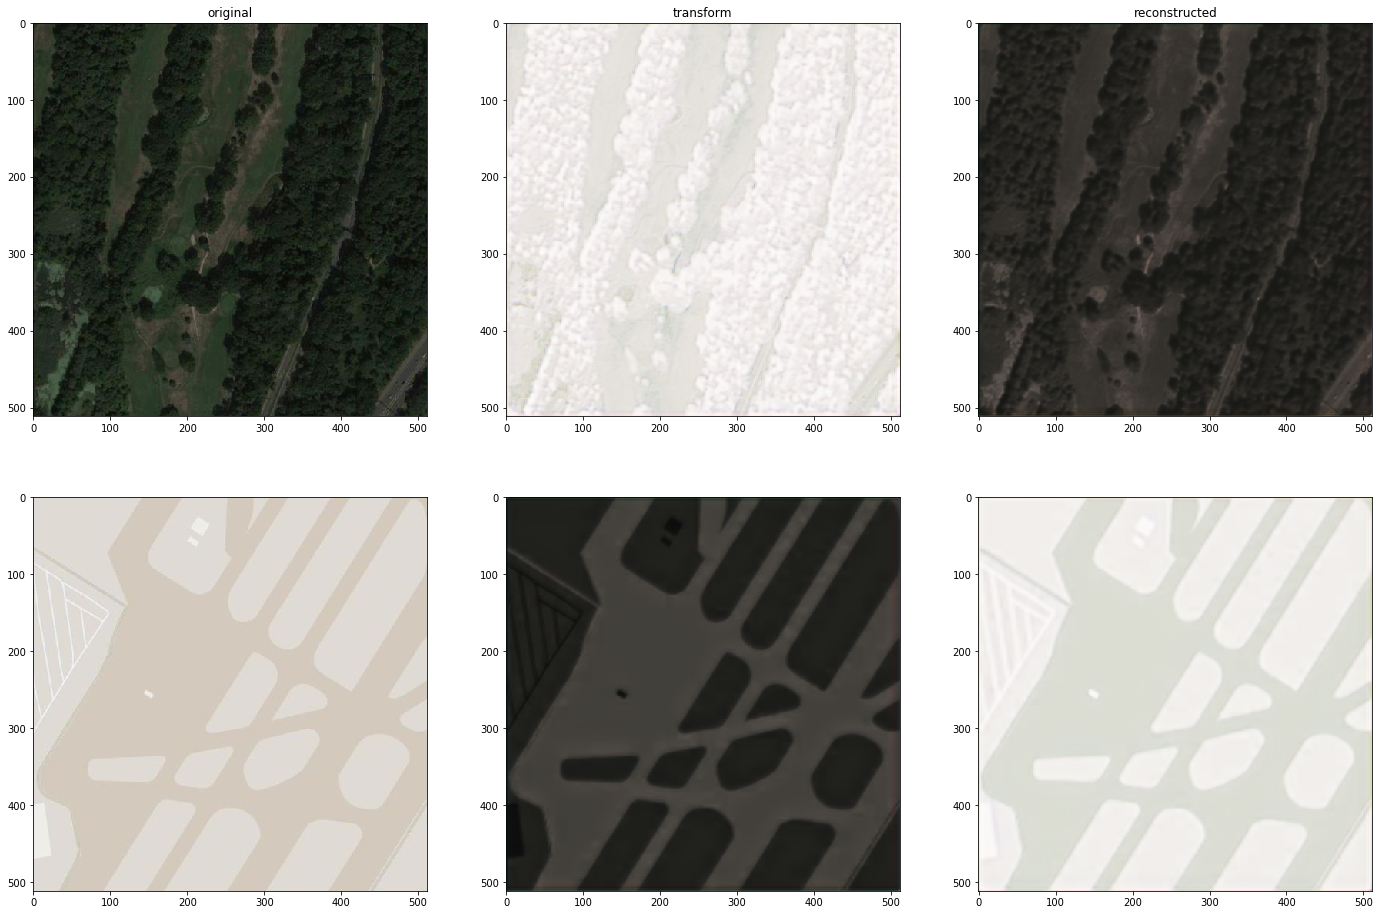

3


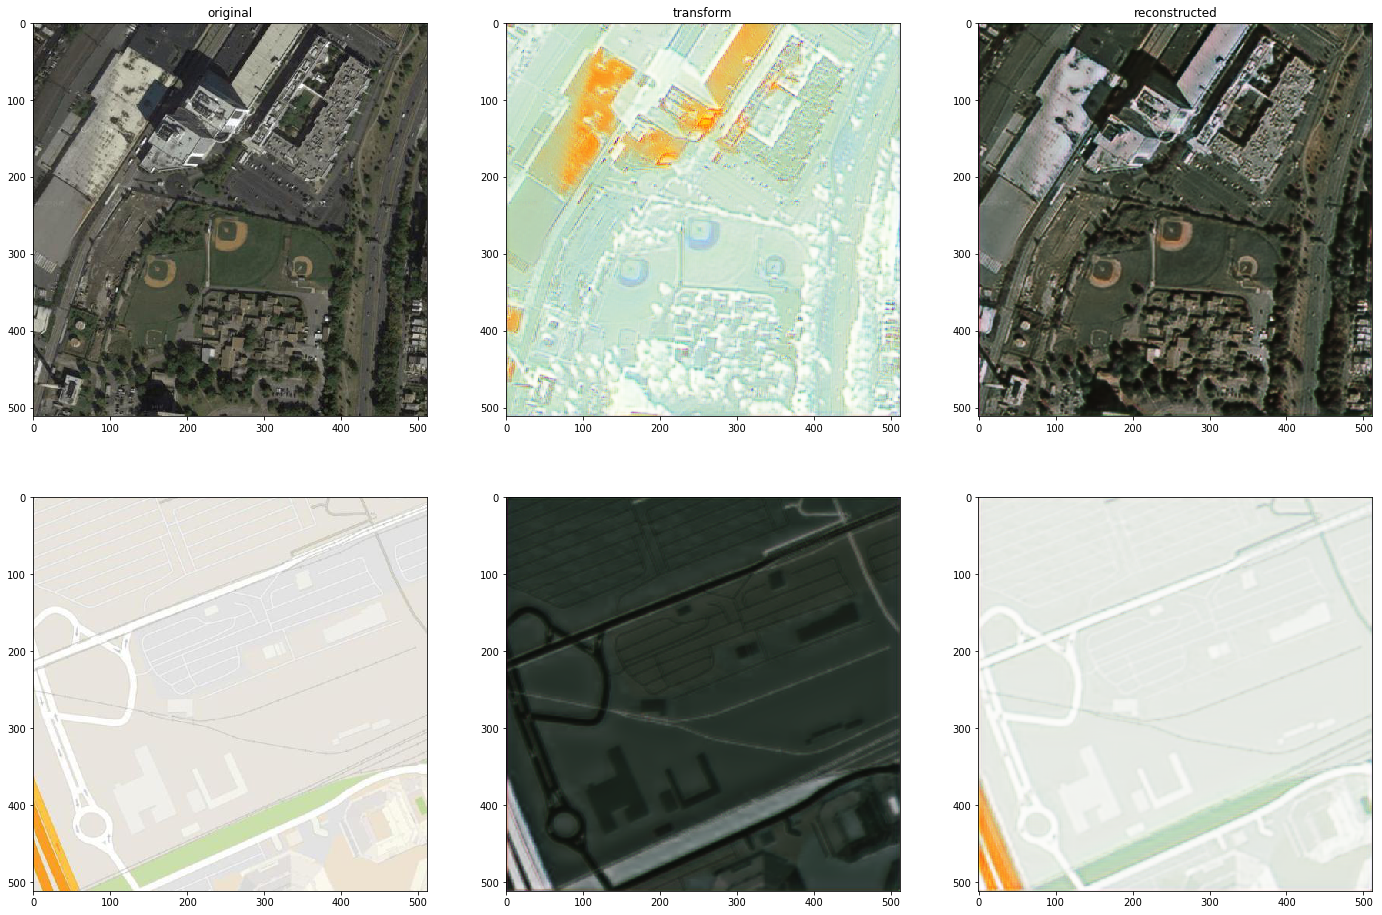

4


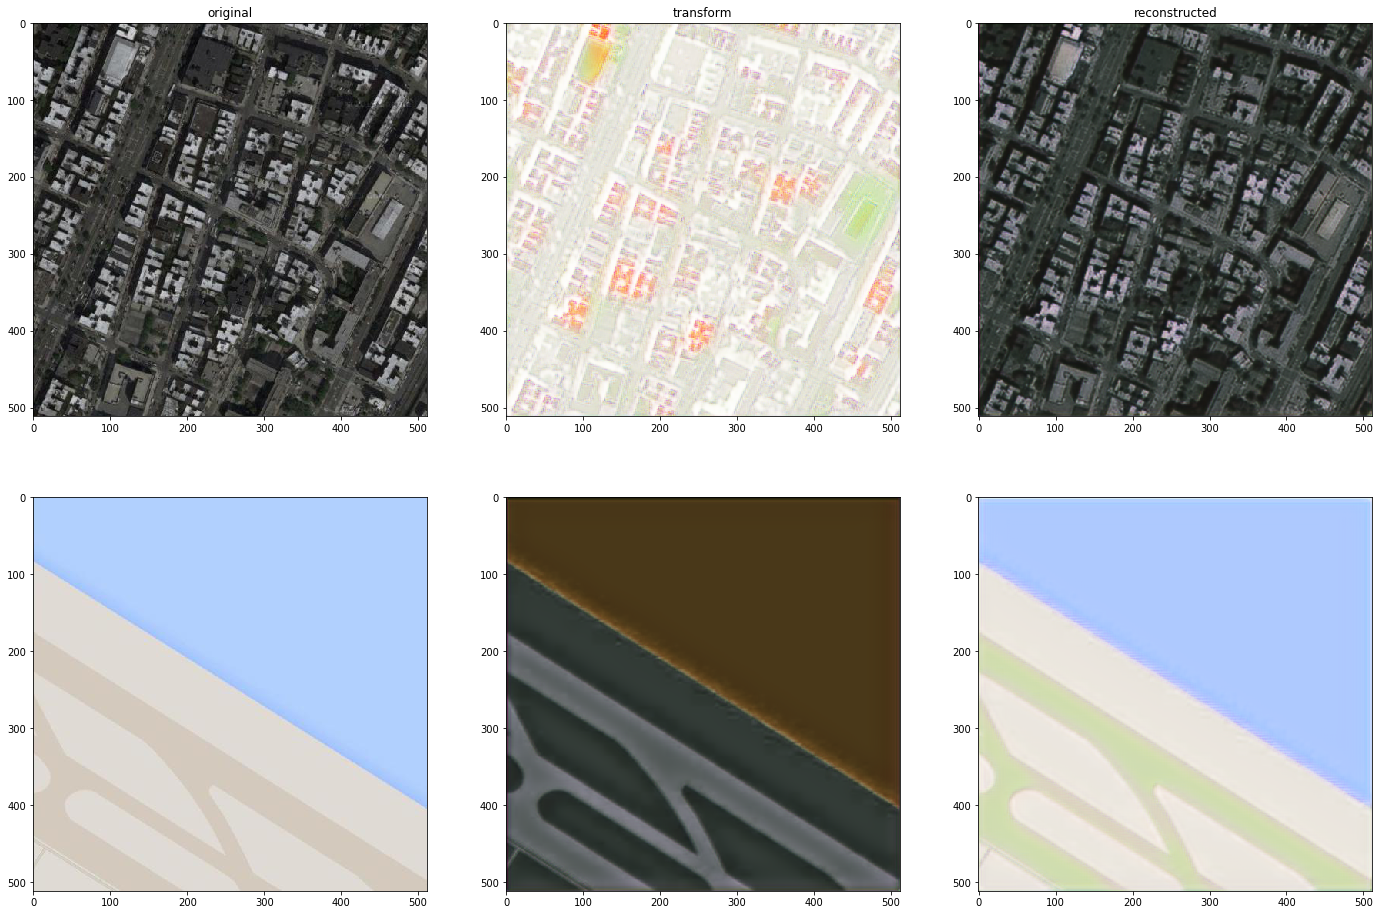

In [3]:
p=cyclegan.train(epochs=5,batch_size=1, sample_interval=1)

## Save Weights

In [ ]:
#assert False
gan=cyclegan.return_gan()
genXY=cyclegan.return_genXY()
genYX=cyclegan.return_genYX()

genXY.save_weights("genXY_testingA.h5")
genYX.save_weights("genYX_testingB.h5")

pred=genYX.predict(img.reshape(1,128,128,3))
plt.imshow(pred.reshape(128,128,3))

In [63]:
genXY.save_weights("genXY_weights_epochs=31_batch_size=1_Closs=10.h5")
genYX.save_weights("genYX_weights_epochs=31_batch_size=1_Closs=10.h5")


In [58]:
cyclegan_new=CycleGan.CycleGan('.\\data\\test\\', 128,128, 3, 10)
genYX_new=cyclegan_new.return_genYX()

In [59]:
img=imageio.imread(".\\data\\test\\trainB\\mona-lisa-facts-thumbnail.jpg")
img=scipy.misc.imresize(img, size=(128,128,3))
None

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


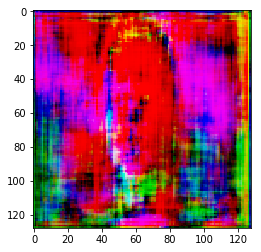

In [60]:
pred=genYX_new.predict(img.reshape(1,128,128,3))
plt.imshow(pred.reshape(128,128,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


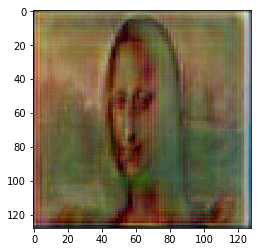

In [61]:
genYX_new.load_weights('genYX_weights.h5')
pred=genYX_new.predict(img.reshape(1,128,128,3))
plt.imshow(pred.reshape(128,128,3))